In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from torchvision import datasets, transforms

In [2]:
image_ori = cv2.imread('data/00007.jpg')
image_ori = cv2.cvtColor(image_ori, cv2.COLOR_RGB2GRAY)
image_ori = torch.tensor(image_ori/255., dtype=torch.float64)
image = image_ori.clone()

In [3]:
def denoise_image_linear(image, n_min, n_max, T, plot=True, device='cpu'):
    a = []
    noise_strength = torch.linspace(n_min, n_max, T)
    
    fig, axes = plt.subplots(nrows=1, ncols=T, figsize=(T * 3, 5))
    
    if T == 1:
        axes = [axes]
    original_image = image.to(device)
    
    for ns, ax in zip(noise_strength, axes):
        noise = torch.randn_like(original_image, device=device) * ns
        original_image = original_image + noise
        a.append(original_image)
        ax.imshow(original_image.cpu().numpy(), cmap='gray')
        ax.axis('off')
        ax.set_title(f"Noise Strength: {ns:.4f}")
        
    if plot:
        plt.tight_layout()
        plt.show()
    else:
        plt.close()
        
    return a


In [9]:
images = denoise_image_linear(
    image=image,
    n_min=1e-4,
    n_max=0.02,
    T=1000,
    plot=False,
    device='cuda'
)

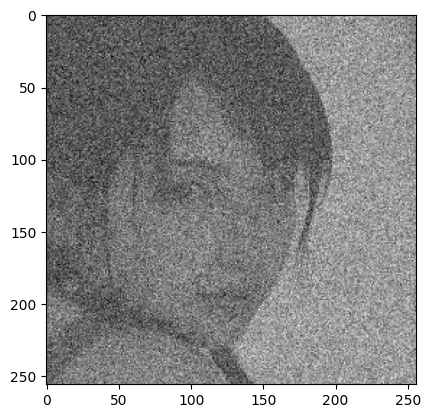

In [10]:
plt.imshow(images[999].cpu(), cmap='gray')

In [27]:
def cosine_scheduler(n_max, n_min, t, T):
    cos_value = (t / T) * np.pi
    cos = np.cos(cos_value)
    n_t = n_max + 0.5 * (n_min - n_max) * (1 + cos)
    return n_t

def denoise_image_cosin(image, n_min, n_max, T, plot=True, device='cpu'):
    a = []
    original_image = image.to(device)
    noise = torch.randn_like(original_image, device=device)
    fig, axes = plt.subplots(nrows=1, ncols=T, figsize=(50, 50))
    
    if T == 1:
        axes = [axes]
    
    for i, ax in enumerate(axes):
        noise_strength = cosine_scheduler(
            n_min=n_min,
            n_max=n_max,
            t=i,
            T=T
        )
        ns = float(noise_strength)
        
        noise = noise + noise * ns
        original_image = original_image + noise
        a.append(original_image.clone())
        ax.imshow(original_image.cpu().numpy(), cmap='gray')
        ax.axis('off')
        ax.set_title(f"{ns:.4f}")

    if plot:
        plt.tight_layout()
        plt.show()
    else:
        plt.close()

    return a


In [28]:
images = denoise_image_cosin(
                                image=image,
                                n_min=1e-4,
                                n_max=0.02,
                                T=100,
                                plot=False,
                                device='cuda'
                            )

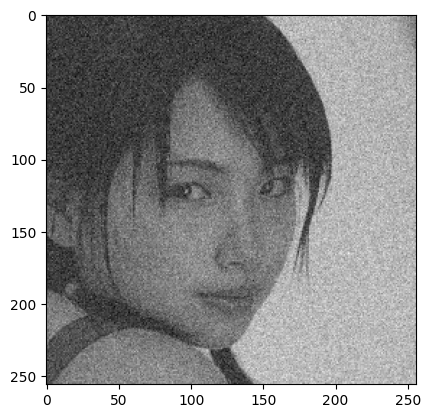

In [22]:
plt.imshow(images[99].cpu(), cmap='gray')